<a href="https://colab.research.google.com/github/Shreya-web226/Tems.tech.solution/blob/main/Sentiment_Analysis_for_Market_Movements_in_the_Finance_Sector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn nltk


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


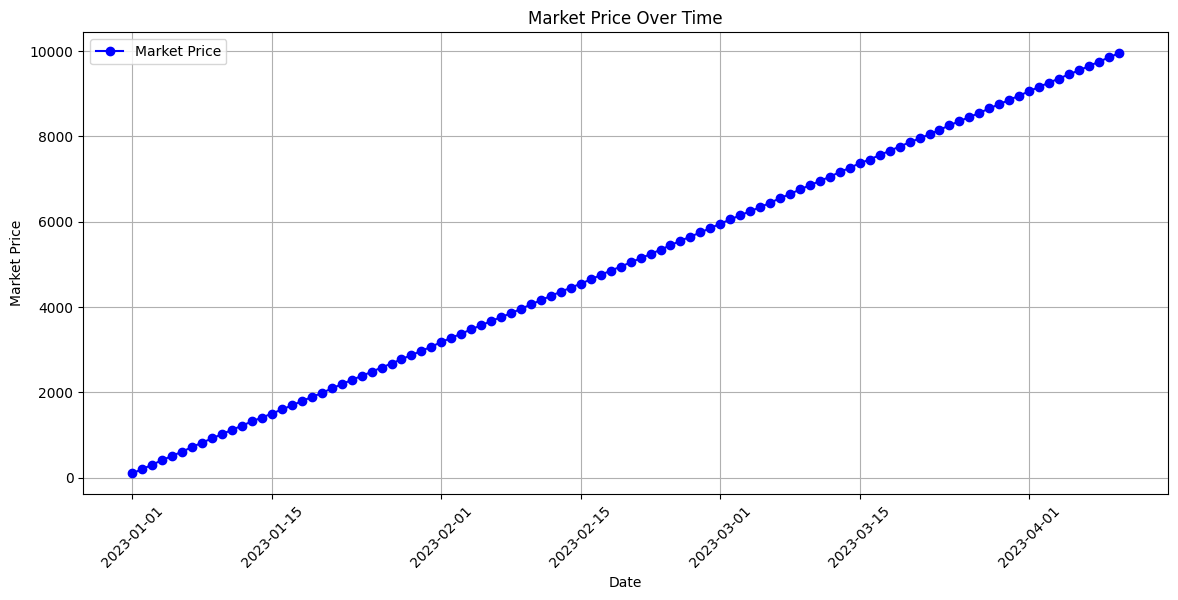

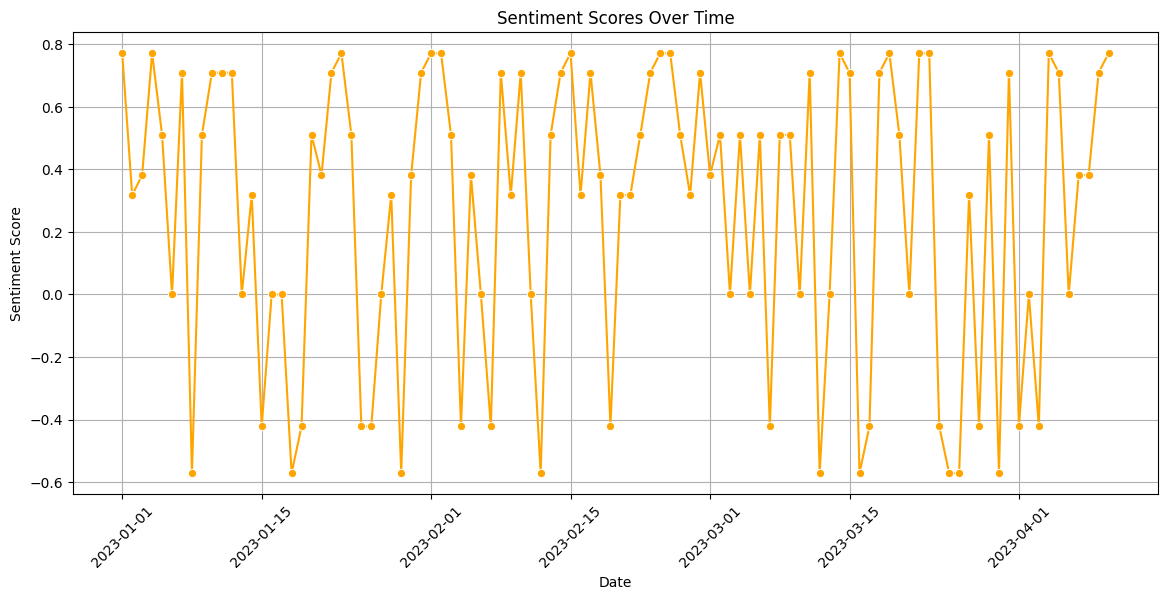

Correlation between Sentiment Scores and Market Prices: -0.05


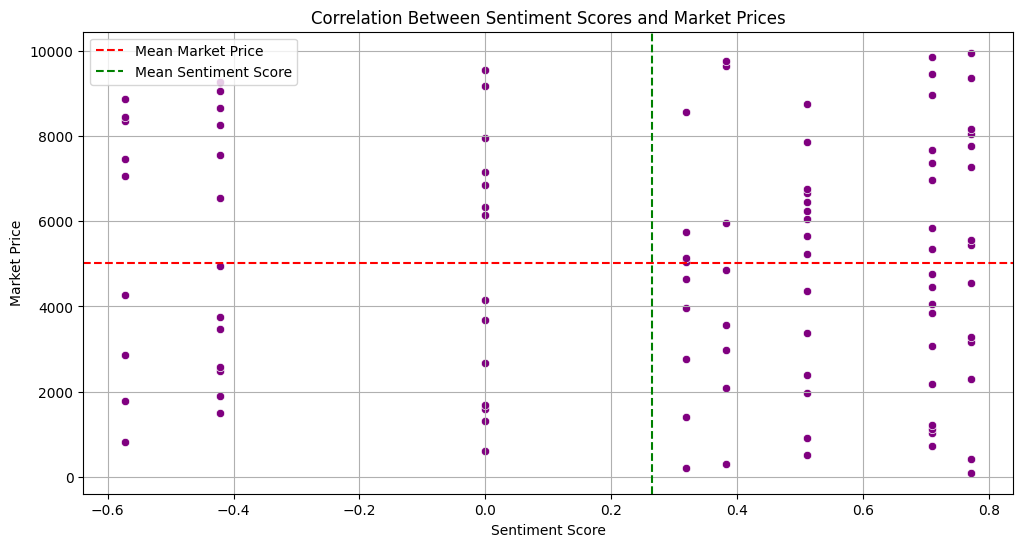

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Setting a random seed for reproducibility
np.random.seed(42)

# Simulating market data and news headlines
n_data_points = 100
dates = pd.date_range(start='2023-01-01', periods=n_data_points, freq='D')
market_prices = np.random.normal(loc=100, scale=5, size=n_data_points).cumsum()  # Simulated stock prices
headlines = [
    "Market rallies as investors gain confidence.",
    "Economic downturn fears weigh on stock prices.",
    "Tech stocks soar following strong earnings reports.",
    "Analysts predict volatility in the coming weeks.",
    "New regulations could impact industry growth.",
    "Investors optimistic about recovery post-pandemic.",
    "Negative sentiment grows around inflation concerns.",
    "Positive economic data boosts market sentiment.",
] * 13  # Repeat to create enough headlines

# Creating a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Market_Price': market_prices,
    'Headline': np.random.choice(headlines, size=n_data_points)
})

# Applying Sentiment Analysis
sia = SentimentIntensityAnalyzer()
data['Sentiment_Score'] = data['Headline'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Plotting Market Prices and Sentiment Scores
plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['Market_Price'], label='Market Price', color='blue', marker='o')
plt.title('Market Price Over Time')
plt.xlabel('Date')
plt.ylabel('Market Price')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x='Date', y='Sentiment_Score', marker='o', color='orange')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.grid()
plt.xticks(rotation=45)
plt.show()

# Analyzing Correlation Between Sentiment Scores and Market Prices
correlation = data['Sentiment_Score'].corr(data['Market_Price'])
print(f"Correlation between Sentiment Scores and Market Prices: {correlation:.2f}")

# Plotting Correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Sentiment_Score', y='Market_Price', color='purple')
plt.title('Correlation Between Sentiment Scores and Market Prices')
plt.xlabel('Sentiment Score')
plt.ylabel('Market Price')
plt.axhline(y=data['Market_Price'].mean(), color='red', linestyle='--', label='Mean Market Price')
plt.axvline(x=data['Sentiment_Score'].mean(), color='green', linestyle='--', label='Mean Sentiment Score')
plt.legend()
plt.grid()
plt.show()
